In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.47 s (started: 2021-04-21 15:53:24 +05:30)


In [ ]:
#Preprocessing
#1.Resize
#2.flatten
import os
import ntpath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='./Images dataset/cropped'
CATEGORIES=[]
for entry in os.scandir(DATADIR):
    if entry.is_dir():
        CATEGORIES.append(ntpath.basename(entry.path))
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)#label encoding the values
  path=os.path.join(DATADIR,category)#create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))#resize
    flat_data.append(img_resized.flatten())#flatten
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
images=np.array(images)
target=np.array(target)

time: 0 ns (started: 2021-04-21 15:53:31 +05:30)


In [ ]:
flat_data[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

time: 16 ms (started: 2021-04-21 15:53:56 +05:30)


In [ ]:
len(target)

0

time: 16 ms (started: 2021-04-21 15:52:55 +05:30)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

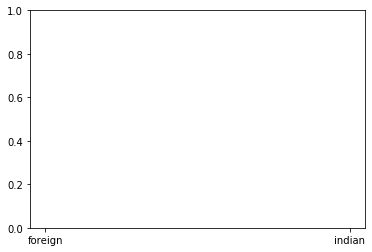

time: 187 ms (started: 2021-04-21 15:53:00 +05:30)


In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#split data into train and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.2,random_state=0)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

time: 218 ms (started: 2021-04-21 15:53:05 +05:30)


In [ ]:
from sklearn.svm import SVC
class_svc=SVC(kernel='rbf',random_state=0)

time: 1.14 ms (started: 2021-04-17 13:58:21 +05:30)


In [ ]:
class_svc.fit(x_train,y_train)

SVC(random_state=0)

time: 14.6 s (started: 2021-04-17 13:58:22 +05:30)


In [ ]:
y_pred=class_svc.predict(x_test)

time: 12.5 s (started: 2021-04-17 13:58:36 +05:30)


In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0])

time: 7.2 ms (started: 2021-04-17 13:58:49 +05:30)


In [ ]:
y_test

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0])

time: 4.32 ms (started: 2021-04-17 13:58:52 +05:30)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6884422110552764

time: 6.11 ms (started: 2021-04-17 13:58:52 +05:30)


In [ ]:
confusion_matrix(y_test,y_pred)

array([[117,  15],
       [ 47,  20]])

time: 7.48 ms (started: 2021-04-17 13:58:52 +05:30)


In [ ]:
#saving the model using pickle library
import pickle
pickle.dump(class_svc,open('humanface_detection.p','wb'))

time: 1.15 s (started: 2021-04-17 13:58:53 +05:30)


In [ ]:
model=pickle.load(open('humanface_detection.p','rb'))

time: 475 ms (started: 2021-04-17 13:58:54 +05:30)


Enter you URLhttps://image.shutterstock.com/image-photo/indian-ethnicity-cheerful-confident-studio-260nw-552325924.jpg
(280, 381, 3)
PREDICTION OUTPUT:indian


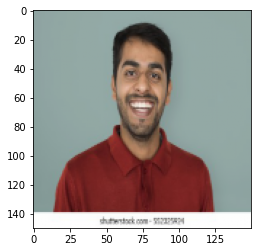

time: 1.85 s (started: 2021-04-17 13:58:56 +05:30)


In [ ]:
#testing a brand new image
flat_data=[]
url=input('Enter you URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTION OUTPUT:{y_out}')